  ## Final Deployment

## Mounting the drive

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!pip install streamlit

     |████████████████████████████████| 7.8MB 4.2MB/s 
     |████████████████████████████████| 4.2MB 34.2MB/s 
     |████████████████████████████████| 112kB 45.5MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 174kB 37.1MB/s 
     |████████████████████████████████| 122kB 46.9MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13476 sha256=9dba2c75f99335974f06bc05717d9466f7249f379c36af539bf780808f16f041
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: ipykernel 6.0.1 has requirement ipython>=7.23.1, but you'll have ipython 5.5.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 6.0.1 which is incompatible.
  Found existing installation: importlib-metadata 4.5.0
    Uninstalling importlib-metadata-4.5.0:
      

In [ ]:
!nvidia-smi


Tue Jul  6 05:38:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 277 (delta 59), reused 40 (delta 20), pack-reused 171
Receiving objects: 100% (277/277), 80.66 KiB | 13.44 MiB/s, done.
Resolving deltas: 100% (121/121), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
Get:11 https://developer.d

In [ ]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:28
🔁 Restarting kernel...


In [ ]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Installing RAPIDS Stable 21.06
Starting the RAPIDS+BlazingSQL install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.0
    - gcsfs
    - llvmlite
    - openssl
    - python=3.7
    - rapids-blazing=21.06


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    abseil-cpp-20210324.1      |       h9c3ff4c_0        1015 KB  conda-forge
    aiohttp-3.7.4.post0        |   py37h5e8e339_0         625 KB  conda-forge
    anyio-3.2.1                |   py37h89c1867_0         138 KB  conda-forge
    appdirs-1.4.4              |     pyh9f0ad1d_0      

In [40]:
%%writefile app.py
import streamlit as st
from PIL import Image
import pandas as pd
import cv2
import numpy as np
from numpy import zeros
from numpy import concatenate
import regex as re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet') 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import joblib
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances
import cuml
from cuml.neighbors import NearestNeighbors
import tensorflow
from tensorflow.keras.applications import EfficientNetB2




st.header("Shoppe Similar Postings")
st.write("Get all similar PostingsIds of Items that already existed")



train_data = pd.read_csv('/content/drive/MyDrive/AppliedAI/DocumentClassification/all_data.csv')
train_data.drop('Unnamed: 0', axis = 1, inplace = True)
train_data.drop('image_txt', axis = 1, inplace = True)

#getting similar images Group ID's

labels_group = train_data.groupby('label_group')

#Let's get all the posting Id's
all_posting_ids = labels_group['posting_id'].unique()


train_data['matches'] = train_data["label_group"].map(all_posting_ids.to_dict())



def predictions(sample_image, title, phash, num_matches):

    model_effB2 = load_model('/content/drive/MyDrive/AppliedAI/DocumentClassification/efficientB2.h5')
    embeds_image = model_effB2.predict(sample_image, use_multiprocessing=True, workers=4, verbose = 3)

    # Loading the efficientNetB2 Knn model
    knn_model = joblib.load('/content/drive/MyDrive/AppliedAI/DocumentClassification/knn_effenet_model.pkl')
    print("Efficient Net Model Loaded")

    # getting Image similar Ids
    img_distances, img_indices = knn_model.kneighbors(embeds_image)
    index = np.where(img_distances < 5)[0]
    post_ids = img_indices[index][0]
    pred_images = train_data.iloc[post_ids]["posting_id"].values

    Input_Text = title.lower()
    Input_Text = re.sub(r'[\n\t\r\\-]+', ' ', Input_Text)
    Input_Text = re.sub(r"won't", "will not", Input_Text)
    Input_Text = re.sub(r"can\'t", "can not", Input_Text)
    Input_Text = re.sub(r"n\'t", " not", Input_Text)
    Input_Text = re.sub(r"\'re", " are", Input_Text)
    Input_Text = re.sub(r"\'s", " is", Input_Text)
    Input_Text = re.sub(r"\'d", " would", Input_Text)
    Input_Text = re.sub(r"\'ll", " will", Input_Text)
    Input_Text = re.sub(r"\'t", " not", Input_Text)
    Input_Text = re.sub(r"\'ve", " have", Input_Text)
    Input_Text = re.sub(r"\'m", " am", Input_Text)
    Input_Text = re.sub(r"[^0-9a-zA-Z_]+", ' ', Input_Text) 
    new_Text = ''
    all_tokens = nltk.word_tokenize(Input_Text)
    for word in all_tokens:
      if word not in stop_words:
        lemma = lemmatizer.lemmatize(word)
        new_Text += ' ' + lemma
    new_Text = new_Text.lstrip()

    #Step4: getting title embedings and loading the tfidf model
    tfidf_title_vectorizer =  joblib.load('/content/drive/MyDrive/AppliedAI/DocumentClassification/tfidf_vectorizer.pickle') 
    tfidf_title_features = joblib.load('/content/drive/MyDrive/AppliedAI/DocumentClassification/all_title_features.pickle')
    embeds_texts = tfidf_title_vectorizer.transform([new_Text])
    # print("Preprocess Completed and got the embeddings to title")

    #Step7: getting title similar Ids
    pair_distances = pairwise_distances(tfidf_title_features, embeds_texts.reshape(1, -1))
    pair_distances = pair_distances.flatten()
    indices_labells = np.argsort(pair_distances)[0:num_matches]
    pred_titles = train_data.iloc[indices_labells]['posting_id'].values


    #step8: getting similar Image_phash
    pred_image_phash = train_data[train_data['image_phash'] == phash]['posting_id'].values

    #getting the unique in all the three predictions
    unique_preds = np.unique(np.concatenate([pred_images, pred_titles, pred_image_phash]))

    return unique_preds


def main():
  file_uploaded = st.file_uploader("Insert Image", type = ['jpg', 'png', 'jpeg'])
  title = st.text_input("", "Please enter the title")
  phash = st.text_input("", "Please enter the Phash Value")
  num_matches = 2
  if file_uploaded is not None:
    sample_image = zeros((1, 224, 224, 3),dtype='float32')
    image = Image.open(file_uploaded)
    image =np.array(image.convert('RGB'))
    image = cv2.resize(image, (224, 224), cv2.INTER_NEAREST)
    st.write("")
    st.write("")
    st.write("")
    st.write("predicting Top Similar Postings")
    st.progress(100)
    st.write("")
    unique_predictions = predictions(title, phash, num_matches)
    tup_post_images = []

    for i in range(0, len(unique_predictions)):
      p_id = train_data[train_data['posting_id'] == unique_predictions[i]]['posting_id'].values.tolist()
      img_id = train_data[train_data['posting_id'] == unique_predictions[i]]['image'].values.tolist()
      tup_post_images.append((p_id, img_id))

    for i in range(0, len(tup_post_images)):
      image_path = '/content/train_images/' + tup_post_images[i][1][0]
      posting_ids = tup_post_images[i][0][0]
      st.write(posting_ids)
      st.image(image_path)

if __name__ == '__main__':
  main()

Overwriting app.py


In [41]:
!ls

app.py	drive  sample_data


In [42]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2021-07-06 07:06:41--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 35.169.250.74, 34.198.133.228, 34.230.251.58, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.169.250.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  6.43MB/s    in 2.1s    

2021-07-06 07:06:44 (6.43 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



In [43]:

!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [44]:
get_ipython().system_raw('./ngrok http 8501 &')


In [45]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the ngrok URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the ngrok URL: https://a3023b5c3aa1.ngrok.io


In [ ]:
!streamlit run /content/app.py

# web Page Demo

youtube Link: https://www.youtube.com/watch?v=VeZ3sBLuKVs

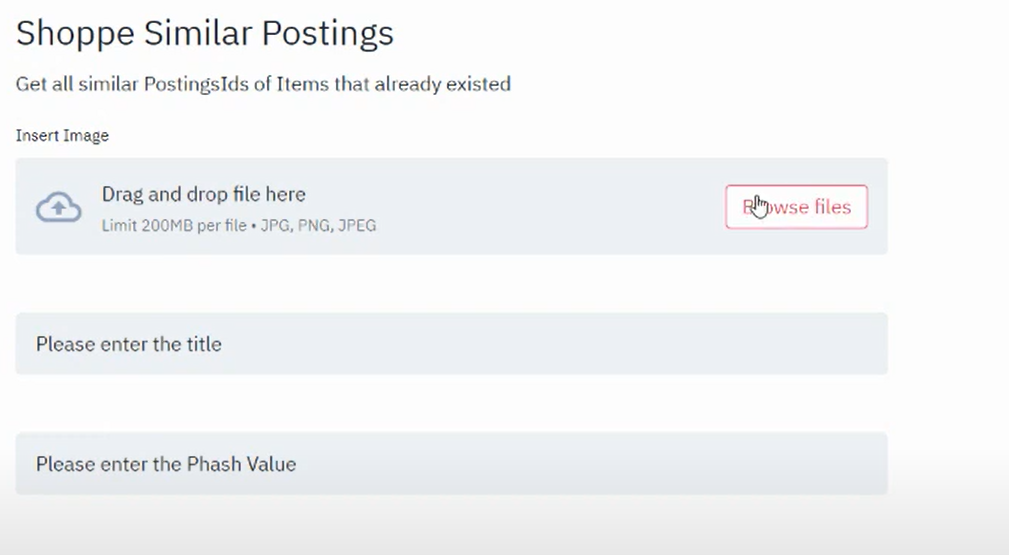